# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st
from pprint import pprint
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
cities_dict = {
    "city": cities
}
city_list = pd.DataFrame(cities_dict)
city_list

,city
0,cape town
1,punta arenas
2,kazachinskoye
3,bluff
4,broome
...,...
617,murdochville
618,san juan de abajo
619,celestun
620,los ranchos de albuquerque


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.

weather = []

print("Beginning Data Retrieval")
print("---------------------------")

rec = 0
sets = 1

for city in cities:
    rec += 1
    print(f"Processing Record {rec} of Set {sets} | {city}")
    
    if rec == 50:
        sets += 1
        rec = 0
        
    try:
        url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
        response = requests.get(url).json()
        weather.append({
            "City": city,
            "Lat": response["coord"]["lat"],
            "Long": response["coord"]["lon"],
            "Max Temp": response["main"]["temp_max"],
            "Humidity": response["main"]["humidity"],
            "Wind": response["wind"]["speed"],
            "Cloudiness": response["clouds"]["all"],
            "Country": response["sys"]["country"],
            "Date": response["dt"]
        })
    except:
        print("City not found. Skipping...")
        pass                        

print('-----------------------------\nData Retrieval Complete\n-----------------------------')


Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | kazachinskoye
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | broome
Processing Record 6 of Set 1 | aykhal
Processing Record 7 of Set 1 | erzin
Processing Record 8 of Set 1 | verkhnyaya inta
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | veraval
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | severo-kurilsk
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | cabrobo
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 1 | da nang
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | banda aceh
Processing Record 20 of Set 1 | kuito
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | lagos
Processing

Processing Record 37 of Set 4 | lithgow
Processing Record 38 of Set 4 | saint-pierre
Processing Record 39 of Set 4 | coihaique
Processing Record 40 of Set 4 | qaqortoq
Processing Record 41 of Set 4 | kapaa
Processing Record 42 of Set 4 | leningradskiy
Processing Record 43 of Set 4 | comodoro rivadavia
Processing Record 44 of Set 4 | honiara
Processing Record 45 of Set 4 | zarubino
Processing Record 46 of Set 4 | souillac
Processing Record 47 of Set 4 | bainbridge
Processing Record 48 of Set 4 | aklavik
Processing Record 49 of Set 4 | butaritari
Processing Record 50 of Set 4 | tual
Processing Record 1 of Set 5 | stornoway
Processing Record 2 of Set 5 | paamiut
Processing Record 3 of Set 5 | bengkulu
Processing Record 4 of Set 5 | kruisfontein
Processing Record 5 of Set 5 | poronaysk
Processing Record 6 of Set 5 | esperance
Processing Record 7 of Set 5 | portage
Processing Record 8 of Set 5 | manono
Processing Record 9 of Set 5 | townsville
Processing Record 10 of Set 5 | jiddah
City not

Processing Record 24 of Set 8 | kendari
Processing Record 25 of Set 8 | sulina
Processing Record 26 of Set 8 | vostok
Processing Record 27 of Set 8 | kohlu
Processing Record 28 of Set 8 | chibombo
Processing Record 29 of Set 8 | kralendijk
Processing Record 30 of Set 8 | torbay
Processing Record 31 of Set 8 | cao bang
Processing Record 32 of Set 8 | redmond
Processing Record 33 of Set 8 | touros
Processing Record 34 of Set 8 | hulan
Processing Record 35 of Set 8 | kushmurun
Processing Record 36 of Set 8 | nelson bay
Processing Record 37 of Set 8 | camacha
Processing Record 38 of Set 8 | eisenhuttenstadt
City not found. Skipping...
Processing Record 39 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 40 of Set 8 | buraydah
Processing Record 41 of Set 8 | airai
Processing Record 42 of Set 8 | nuevitas
Processing Record 43 of Set 8 | curillo
Processing Record 44 of Set 8 | baykalsk
Processing Record 45 of Set 8 | sao borja
Processing Record 46 of Set 8 | port hedland
Proc

City not found. Skipping...
Processing Record 12 of Set 12 | benghazi
Processing Record 13 of Set 12 | sorland
Processing Record 14 of Set 12 | vinh long
Processing Record 15 of Set 12 | ola
Processing Record 16 of Set 12 | najran
Processing Record 17 of Set 12 | revelstoke
Processing Record 18 of Set 12 | kijang
Processing Record 19 of Set 12 | sitka
Processing Record 20 of Set 12 | te anau
Processing Record 21 of Set 12 | traverse city
Processing Record 22 of Set 12 | zelenogorskiy
Processing Record 23 of Set 12 | kurchum
Processing Record 24 of Set 12 | ucluelet
Processing Record 25 of Set 12 | pottstown
Processing Record 26 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 27 of Set 12 | tilichiki
Processing Record 28 of Set 12 | palana
Processing Record 29 of Set 12 | namatanai
Processing Record 30 of Set 12 | det udom
Processing Record 31 of Set 12 | bintulu
Processing Record 32 of Set 12 | kostomuksha
Processing Record 33 of Set 12 | karaj
Processing Record 34 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Display the DataFrame
city_df = pd.DataFrame(weather)
city_df.head()

,City,Lat,Long,Max Temp,Humidity,Wind,Cloudiness,Country,Date
0,cape town,-33.9258,18.4232,66.99,88,10.36,20,ZA,1611030633
1,punta arenas,-53.1500,-70.9167,48.20,76,5.75,20,CL,1611030739
2,kazachinskoye,57.6953,93.2761,2.26,89,11.45,100,RU,1611030739
3,bluff,-46.6000,168.3333,57.99,57,17.00,68,NZ,1611030739
4,broome,42.2506,-75.8330,28.99,93,9.22,90,US,1611030739


In [6]:
# Export Dataframe into a .csv
city_df.to_csv("cities.csv", index=False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# hum_del = city_df.loc[(city_df["Humidity"])>100]
# print(hum_del)
hum_del_df=city_df.describe()
hum_del_df
# Export Dataframe into a .csv
hum_del_df.to_csv("hum.csv", index=False)
hum_del_df

,Lat,Long,Max Temp,Humidity,Wind,Cloudiness,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,21.372031,18.460630,47.593181,73.940246,8.229490,54.878735,1.611031e+09
std,32.802464,90.942386,32.770074,19.435519,5.904746,39.220365,7.686255e+01
min,-54.800000,-179.166700,-59.800000,1.000000,0.310000,0.000000,1.611030e+09
25%,-3.928100,-63.849100,28.600000,64.000000,3.780000,14.000000,1.611031e+09
50%,25.483300,22.364700,57.200000,78.000000,6.910000,66.000000,1.611031e+09
75%,49.216700,99.825000,72.950000,87.000000,11.430000,92.000000,1.611031e+09
max,78.218600,179.316700,102.200000,100.000000,39.120000,100.000000,1.611031e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
print("How unfortunate. There are no cities with humidity over 100%")

How unfortunate. There are no cities with humidity over 100%


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data_df = city_df.copy(deep=True)
clean_city_data_df

quartiles = clean_city_data_df["Humidity"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

hum_clean_df = clean_city_data_df.loc[(clean_city_data_df["Humidity"] < lower_bound) | (clean_city_data_df["Humidity"] > upper_bound)]
hum_clean_df.head()



The lower quartile of occupancy is: 64.0
The upper quartile of occupancy is: 87.0
The interquartile range of occupancy is: 23.0
The the median of occupancy is: 78.0 
Values below 29.5 could be outliers.
Values above 121.5 could be outliers.


,City,Lat,Long,Max Temp,Humidity,Wind,Cloudiness,Country,Date
9,veraval,20.9000,70.3667,77.97,28,6.11,0,IN,1611030740
12,busselton,-33.6500,115.3333,95.00,25,11.01,22,AU,1611030741
38,ippy,6.2679,21.2247,66.67,25,5.86,12,CF,1611030749
39,wangaratta,-36.3667,146.3333,88.00,10,12.66,3,AU,1611030749
40,hasaki,35.7333,140.8333,48.00,29,19.57,20,JP,1611030749


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

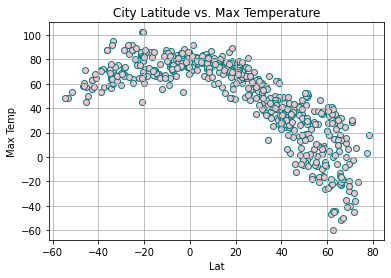

In [12]:
x_values = city_df["Lat"]
y_values = city_df["Max Temp"]
plt.scatter(x_values,y_values, marker="o", facecolors="pink", edgecolors="teal")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
plt.savefig("images/lattemp.png")
plt.show()

## Latitude vs. Humidity Plot

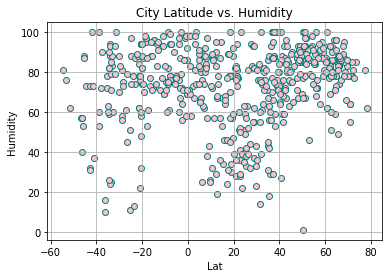

In [13]:
x_values = city_df["Lat"]
y_values = city_df["Humidity"]
plt.scatter(x_values,y_values, marker="o", facecolors="pink", edgecolors="teal" )
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.savefig("images/lathum.png")
plt.show()

## Latitude vs. Cloudiness Plot

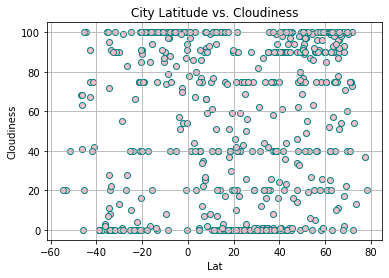

In [14]:
x_values = city_df["Lat"]
y_values = city_df["Cloudiness"]
plt.scatter(x_values,y_values, marker="o", facecolors="pink", edgecolors="teal")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.savefig("images/latcloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

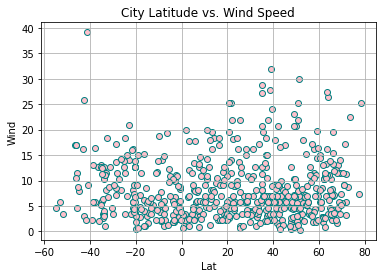

In [15]:
x_values = city_df["Lat"]
y_values = city_df["Wind"]
plt.scatter(x_values,y_values, marker="o", facecolors="pink", edgecolors="teal")
plt.xlabel("Lat")
plt.ylabel("Wind")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.savefig("images/latwind.png")
plt.show()

## Linear Regression

In [16]:
# Need to define Northern Hemisphere and Southern Hemisphere

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

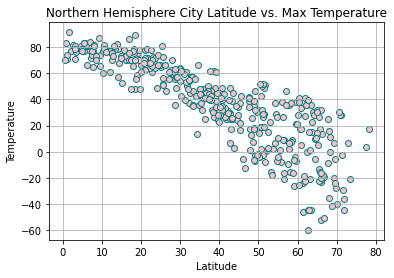

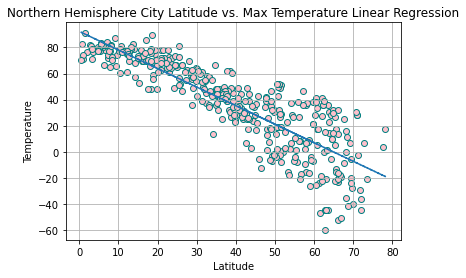

In [17]:
north = (city_df.loc[city_df["Lat"]>0])
south = (city_df.loc[city_df["Lat"]<0])

n_lat = north["Lat"]
s_lat = south["Lat"]
# print(n_lat)

n_temp = north["Max Temp"]
s_temp = south["Max Temp"]
# print(north)

x_values = n_lat
y_values = n_temp
plt.scatter(x_values,y_values, marker="o", facecolors="pink", edgecolors="teal")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Northern Hemisphere City Latitude vs. Max Temperature")
plt.grid()
plt.show()

# Perform a linear regression on year versus violent crime rate
temp_slope, temp_int, temp_r, temp_p, temp_std_err = st.linregress(n_lat, n_temp)
temp_eq = temp_slope * n_temp + temp_int
# print(temp_eq)

# Create equation of line to calculate predicted violent crime rate
temp_eq = temp_slope * n_lat + temp_int

# Plot the linear model on top of scatter plot 
x_values = n_lat
y_values = n_temp
plt.scatter(n_lat,n_temp, marker="o", facecolors="pink", edgecolors="teal")
plt.plot(n_lat,temp_eq,"--")
# plt.xticks(n_lat, rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Northern Hemisphere City Latitude vs. Max Temperature Linear Regression")
plt.grid()
plt.savefig("images/nlattemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

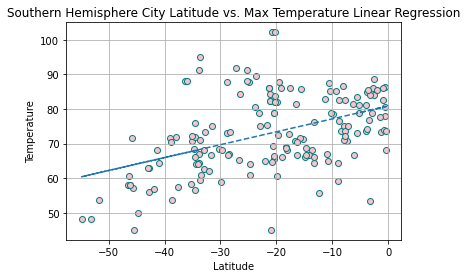

In [18]:
# Perform a linear regression on year versus violent crime rate
temp_slope, temp_int, temp_r, temp_p, temp_std_err = st.linregress(s_lat, s_temp)
temp_eq = temp_slope * s_temp + temp_int
# print(temp_eq)

# Create equation of line to calculate predicted violent crime rate
temp_eq = temp_slope * s_lat + temp_int

x_values = s_lat
y_values = s_temp
plt.scatter(s_lat,s_temp, marker="o", facecolors="pink", edgecolors="teal")
plt.plot(s_lat,temp_eq,"--")
# plt.xticks(s_lat, rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Southern Hemisphere City Latitude vs. Max Temperature Linear Regression")
plt.grid()
plt.savefig("images/slattemp.png")
plt.show()

<b>Northern and Southern Hemisphere - Latitude vs. Temperature</b>
    <p></p>
    <body>
    Northern Hemisphere City Latitude vs. Max Temperature Linear Regression shows that higher temperatures correspond to a lower latitude (closer to 0 latitude), i.e. closer to the equator where it is warmest. The Southern Hemisphere City Latitude vs. Temperature Linear Regression shows that higher temperatures correspond to higher latitude (again, closer to 0) since Southern Hemisphere latitudes are in negative numbers. 
    </body>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

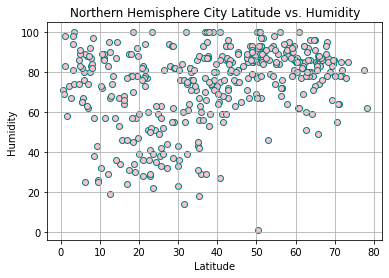

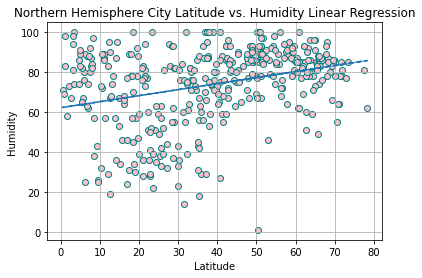

In [19]:
north = (city_df.loc[city_df["Lat"]>0])
south = (city_df.loc[city_df["Lat"]<0])

n_lat = north["Lat"]
s_lat = south["Lat"]
# print(n_lat)

n_hum = north["Humidity"]
s_hum = south["Humidity"]


x_values = n_lat
y_values = n_hum
plt.scatter(x_values,y_values, marker="o", facecolors="pink", edgecolors="teal")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere City Latitude vs. Humidity")
plt.grid()
plt.show()

# Perform a linear regression on year versus violent crime rate
hum_slope, hum_int, hum_r, hum_p, hum_std_err = st.linregress(n_lat, n_hum)
hum_eq = hum_slope * n_hum + hum_int
# print(hum_eq)

# Create equation of line to calculate predicted violent crime rate
hum_eq = hum_slope * n_lat + hum_int

# Plot the linear model on top of scatter plot 
x_values = n_lat
y_values = n_hum
plt.scatter(n_lat,n_hum, marker="o", facecolors="pink", edgecolors="teal")
plt.plot(n_lat,hum_eq,"--")
# plt.xticks(n_lat, rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere City Latitude vs. Humidity Linear Regression")
plt.grid()
plt.savefig("images/nlathum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

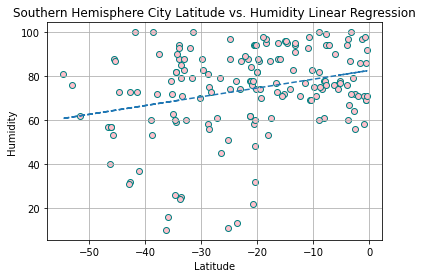

In [20]:
# Perform a linear regression on year versus violent crime rate
hum_slope, hum_int, hum_r, hum_p, hum_std_err = st.linregress(s_lat, s_hum)
hum_eq = hum_slope * s_hum + hum_int
# print(hum_eq)

# Create equation of line to calculate predicted violent crime rate
hum_eq = hum_slope * s_lat + hum_int

# Plot the linear model on top of scatter plot 
x_values = s_lat
y_values = s_hum
plt.scatter(s_lat,s_hum, marker="o", facecolors="pink", edgecolors="teal")
plt.plot(s_lat,hum_eq,"--")
# plt.xticks(n_lat, rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere City Latitude vs. Humidity Linear Regression")
plt.grid()
plt.savefig("images/slathum.png")
plt.show()

<b>Northern and Southern Hemisphere - Latitude vs. Humidity</b>
    <p></p>
    <body>
    Northern and Southern Hemisphere City Latitude vs. Humidity Linear Regression plots show that humidity increases closest to the equator, and that in colder regions there is almost no humidity. 
    </body>

##### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

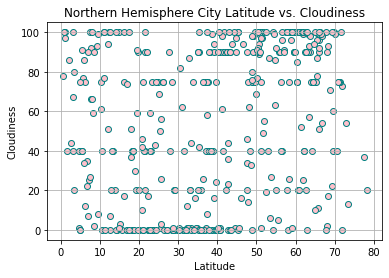

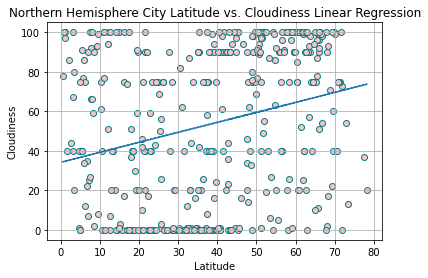

In [21]:
north = (city_df.loc[city_df["Lat"]>0])
south = (city_df.loc[city_df["Lat"]<0])

n_lat = north["Lat"]
s_lat = south["Lat"]
# print(n_lat)

n_cloud = north["Cloudiness"]
s_cloud = south["Cloudiness"]


x_values = n_lat
y_values = n_cloud
plt.scatter(x_values,y_values, marker="o", facecolors="pink", edgecolors="teal")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness")
plt.grid()
plt.show()

# Perform a linear regression on year versus violent crime rate
cloud_slope, cloud_int, cloud_r, cloud_p, cloud_std_err = st.linregress(n_lat, n_cloud)
cloud_eq = cloud_slope * n_cloud + cloud_int
# print(cloud_eq)

# Create equation of line to calculate predicted violent crime rate
cloud_eq = cloud_slope * n_lat + cloud_int

# Plot the linear model on top of scatter plot 
x_values = n_lat
y_values = n_cloud
plt.scatter(n_lat,n_cloud, marker="o", facecolors="pink", edgecolors="teal")
plt.plot(n_lat,cloud_eq,"--")
# plt.xticks(n_lat, rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness Linear Regression")
plt.grid()
plt.savefig("images/nlatcloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

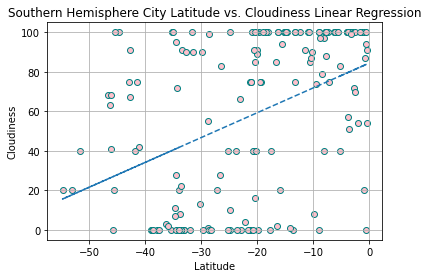

In [22]:
# Perform a linear regression on year versus violent crime rate
cloud_slope, cloud_int, cloud_r, cloud_p, cloud_std_err = st.linregress(s_lat, s_cloud)
cloud_eq = cloud_slope * s_cloud + cloud_int
# print(cloud_eq)

# Create equation of line to calculate predicted violent crime rate
cloud_eq = cloud_slope * s_lat + cloud_int

# Plot the linear model on top of scatter plot 
x_values = s_lat
y_values = s_cloud
plt.scatter(s_lat,s_cloud, marker="o", facecolors="pink", edgecolors="teal")
plt.plot(s_lat,cloud_eq,"--")
# plt.xticks(n_lat, rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness Linear Regression")
plt.grid()
plt.savefig("images/slatcloud.png")
plt.show()

<b>Northern and Southern Hemisphere - Latitude vs. Cloudiness</b>
    <p></p>
    <body>
    Northern and Southern Hemisphere City Latitude vs. Humidity Linear Regression plots show that cloudiness in the Northern and Southern hemisphere occurs mostly in areas further north. 
    </body>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

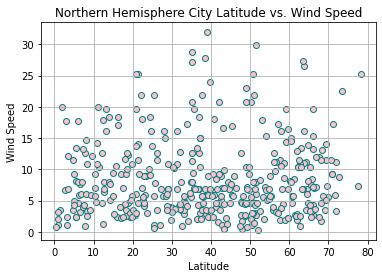

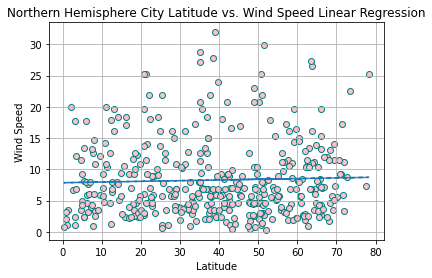

In [23]:
north = (city_df.loc[city_df["Lat"]>0])
south = (city_df.loc[city_df["Lat"]<0])

n_lat = north["Lat"]
s_lat = south["Lat"]
# print(n_lat)

n_wind = north["Wind"]
s_wind = south["Wind"]


x_values = n_lat
y_values = n_wind
plt.scatter(x_values,y_values, marker="o", facecolors="pink", edgecolors="teal")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed")
plt.grid()
plt.show()

# Perform a linear regression on year versus violent crime rate
wind_slope, wind_int, wind_r, wind_p, wind_std_err = st.linregress(n_lat, n_wind)
wind_eq = wind_slope * n_wind + wind_int
# print(cloud_eq)

# Create equation of line to calculate predicted violent crime rate
wind_eq = wind_slope * n_lat + wind_int

# Plot the linear model on top of scatter plot 
x_values = n_lat
y_values = n_wind
plt.scatter(n_lat,n_wind, marker="o", facecolors="pink", edgecolors="teal")
plt.plot(n_lat,wind_eq,"--")
# plt.xticks(n_lat, rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed Linear Regression")
plt.grid()
plt.savefig("images/nlatwind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

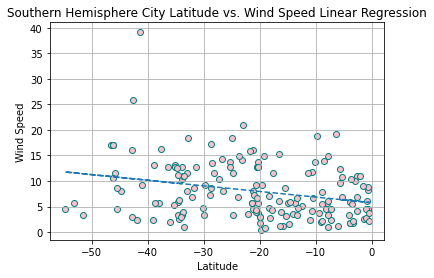

In [24]:
# Perform a linear regression on year versus violent crime rate
wind_slope, wind_int, wind_r, wind_p, wind_std_err = st.linregress(s_lat, s_wind)
wind_eq = wind_slope * s_wind + wind_int
# print(cloud_eq)

# Create equation of line to calculate predicted violent crime rate
wind_eq = wind_slope * s_lat + wind_int

# Plot the linear model on top of scatter plot 
x_values = s_lat
y_values = s_wind
plt.scatter(s_lat,s_wind, marker="o", facecolors="pink", edgecolors="teal")
plt.plot(s_lat,wind_eq,"--")
# plt.xticks(n_lat, rotation=90)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed Linear Regression")
plt.grid()
plt.savefig("images/slatwind.png")
plt.show()

<b>Northern and Southern Hemisphere - Latitude vs. Wind Speed</b>
    <p></p>
    <body>
    Northern and Southern Hemisphere City Latitude vs. Wind Speed Linear Regression plots show 
    that wind speeds are consistently less than about 10 mph in both hemispheres, and that can be seen with the flat linear
    regression line. 
    </body>